In [ ]:
# install libraries for colab
!pip install librosa PySoundFile

In [2]:
# donwload voice dataset
!wget http://ss-takashi.sakura.ne.jp/corpus/jsut_ver1.1.zip

--2022-11-25 14:13:56--  http://ss-takashi.sakura.ne.jp/corpus/jsut_ver1.1.zip
Resolving ss-takashi.sakura.ne.jp (ss-takashi.sakura.ne.jp)... 219.94.162.51
Connecting to ss-takashi.sakura.ne.jp (ss-takashi.sakura.ne.jp)|219.94.162.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2688749844 (2.5G) [application/zip]
Saving to: ‘jsut_ver1.1.zip.1’

jsut_ver1.1.zip.1     2%[                    ]  70.65M  9.53MB/s    eta 4m 23s ^C


In [ ]:
# unzip donwloaded file
!unzip jsut_ver1.1.zip

In [7]:
# original sampling rate is 48kHz so we transform it to 16kHz
import os

os.makedirs("data/wav", exist_ok=True)

import librosa
import soundfile
from tqdm import tqdm
from glob import glob

orig_sr = 48000
target_sr = 16000
# it takes a lot of time, so we limit the number of processing it.
file_limit = 100
original_files = list(glob("jsut_ver1.1/basic5000/wav/*"))

for f in tqdm(original_files[:file_limit]):
    wav, _ = librosa.load(f, sr=orig_sr)
    resampled_wav = librosa.resample(wav, orig_sr, target_sr)
    soundfile.write(f'data/wav/{f.split("/")[-1]}', resampled_wav, target_sr, "PCM_16")

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_2608/2657847527.py:19: FutureWarning: Pass orig_sr=48000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_wav = librosa.resample(wav, orig_sr, target_sr)
  1%|          | 1/100 [00:01<01:54,  1.16s/it]/tmp/ipykernel_2608/2657847527.py:19: FutureWarning: Pass orig_sr=48000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_wav = librosa.resample(wav, orig_sr, target_sr)
100%|██████████| 100/100 [00:10<00:00,  9.72it/s]


In [8]:
# hear the sound
import IPython.display

data = list(glob("data/wav/*"))
IPython.display.Audio(original_files[0])

sampling Frequency: 16000[Hz]
Sample Size: 2[Byte]
Number of Channels: 1
Number of Samples: 51040


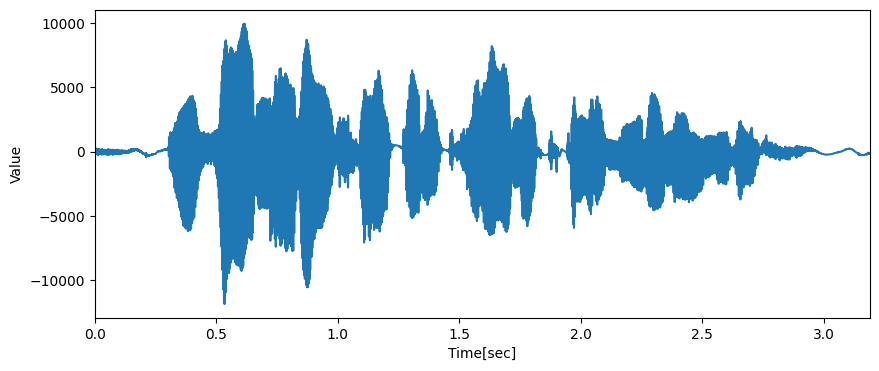

In [9]:
# check the wave form
import wave
import numpy as np
import matplotlib.pyplot as plt

with wave.open(data[0]) as wav:
    sampling_freq = wav.getframerate()
    sample_size = wav.getsampwidth()
    num_channels = wav.getnchannels()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    waveform = np.frombuffer(waveform, dtype=np.int16)

print(f"sampling Frequency: {sampling_freq}[Hz]")
print(f"Sample Size: {sample_size}[Byte]")
print(f"Number of Channels: {num_channels}")
print(f"Number of Samples: {num_samples}")

time_axis = np.arange(num_samples) / sampling_freq
plt.figure(figsize=(10, 4))
plt.plot(time_axis, waveform)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.xlim([0, num_samples / sampling_freq])
plt.savefig("outputs/voice.png")

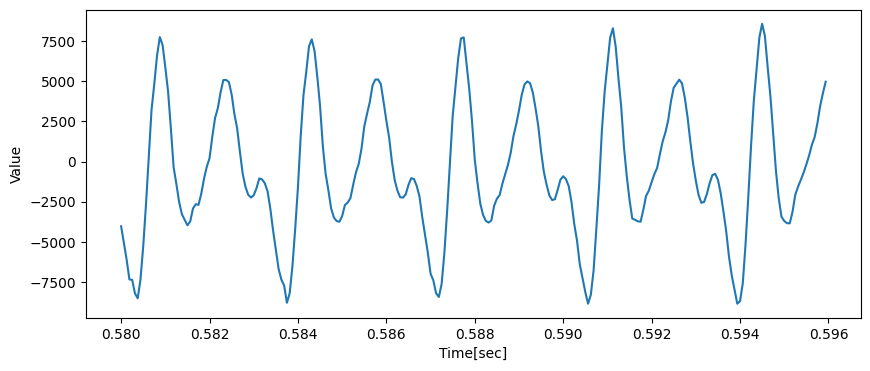

In [10]:
# select the time when she speak "o"
target_time = 0.58
fft_size = 256
out_plot = "outputs/spectrum.png"

# calc corresponded index number to target_time
target_index = int(target_time * sampling_freq)
# cut waveform
frame = waveform[target_index : target_index + fft_size]

# show target voice
time_axis = np.arange(len(frame)) / sampling_freq + target_time
plt.figure(figsize=(10, 4))
plt.plot(time_axis, frame)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.show()

In [7]:
# apply FFT to the target voice, and check spectrum
spectrum = np.fft.fft(frame)
print(spectrum)

[-1.31395000e+05+0.00000000e+00j -8.16234970e+03+7.49537421e+02j
 -8.17763068e+03-1.55668518e+04j -5.02047319e+03-3.65357360e+04j
  6.84366935e+03-9.76945555e+04j -8.06187829e+04+2.12101907e+05j
 -3.91375518e+04+2.65509947e+04j -3.83906799e+04-1.32995400e+04j
 -4.98803280e+04-6.70917082e+04j -1.57855292e+05-3.21685174e+05j
  7.88524143e+04+2.76158183e+05j  2.00432597e+04+1.28609249e+05j
  6.37291709e+03+9.52116966e+04j  1.41881216e+03+1.00130456e+05j
  9.70702795e+04+4.18527499e+05j -3.97047368e+04-1.91165763e+03j
 -2.60015573e+04+1.42490603e+04j -3.60867157e+04+1.79356675e+04j
 -6.97617086e+04+2.39775867e+04j  2.20334105e+05-6.24877435e+04j
  5.04802929e+04+1.49224385e+04j  2.21190971e+04+1.22051425e+04j
  1.82214545e+04+1.22362053e+04j  2.62854136e+04-7.57669664e+00j
 -1.53762551e+04+2.09982954e+04j -3.47278020e+03+1.44154041e+04j
 -3.22174171e+03+1.34156825e+04j -3.93573587e+03+9.99530914e+03j
 -1.76482914e+04-6.76824529e+01j  2.56191305e+03+1.65553904e+04j
  8.59355531e+00+1.423039

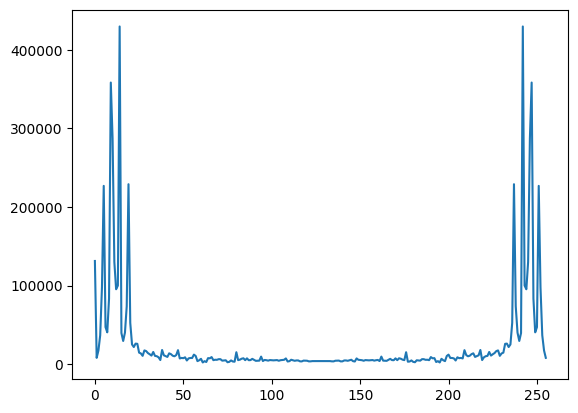

In [8]:
absolute = np.abs(spectrum)
plt.plot(absolute)
plt.show()

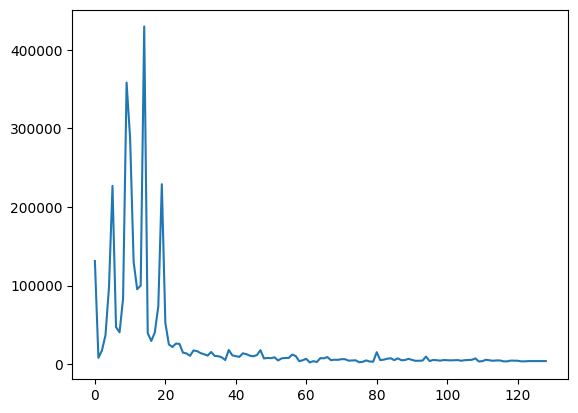

In [9]:
# 振幅スペクトル
absolute = absolute[: int(len(absolute) / 2 + 1)]
plt.plot(absolute)
plt.show()

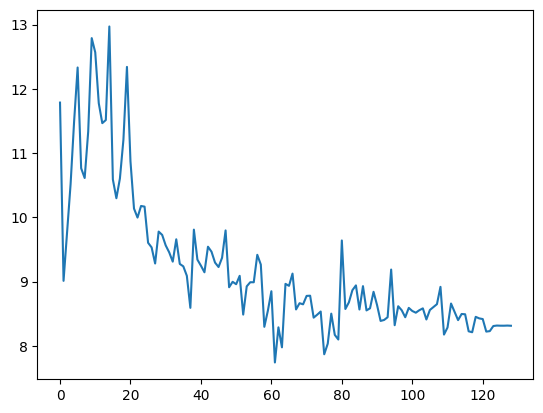

In [10]:
# 対数スペクトル
log_absolute = np.log(absolute + 1e-7)
plt.plot(log_absolute)
plt.show()

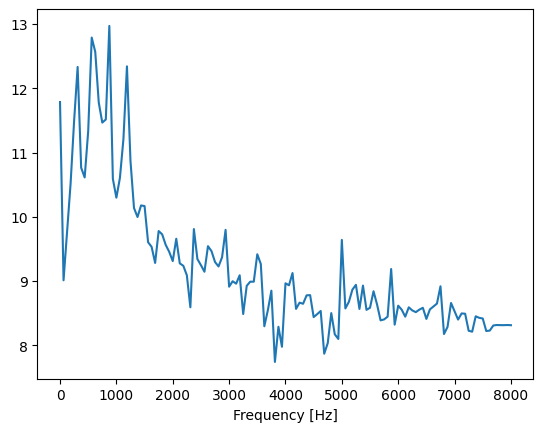

129


In [12]:
# show the spectrum as frequency
freqs = np.arange(int(fft_size / 2 + 1)) * sampling_freq / fft_size
plt.plot(freqs, log_absolute)
plt.xlabel("Frequency [Hz]")
plt.show()

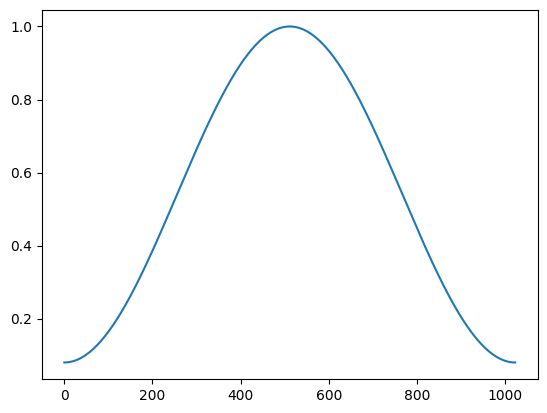

In [ ]:
# hamming window
def hamming(N):
    def h(n, N):
        return 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

    return [h(i, N) for i in range(N)]


x = np.arange(fft_size)
y = hamming(fft_size)
plt.plot(x, y)
plt.show()

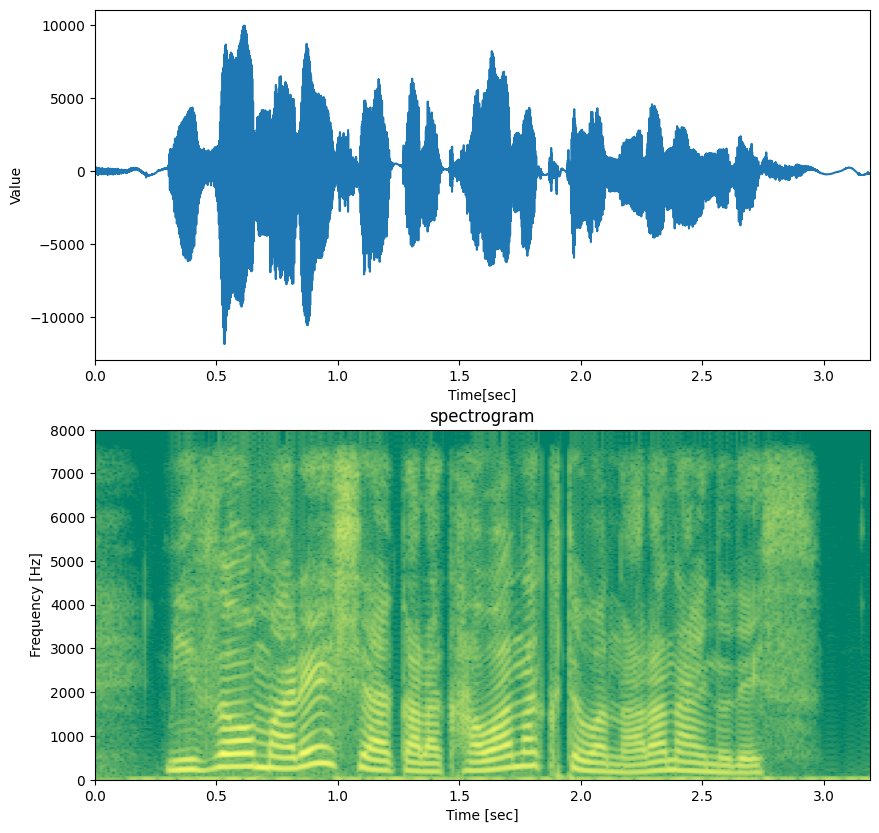

In [36]:
# create log-scaled spectrum
frame_size = 25  # milli second
frame_shift = 10
out_plot = "outputs/sample_spectrum.png"

frame_size = int(sampling_freq * frame_size / 1000)
frame_shift = int(sampling_freq * frame_shift / 1000)

# get minimum fft size bigger than frame size
fft_size = 1
while fft_size < frame_size:
    fft_size *= 2

# number of values of the target frame
num_frames = (num_samples - frame_size) // frame_shift + 1
spectrogram = np.zeros((num_frames, int(fft_size / 2) + 1))

for frame_idx in range(num_frames):
    start_index = frame_idx * frame_shift
    frame = waveform[start_index : start_index + frame_size].copy()
    # apply hamming window
    frame = frame * np.hamming(frame_size)
    spectrum = np.fft.fft(frame, n=fft_size)
    absolute = np.abs(spectrum)
    absolute = absolute[: int(len(absolute) / 2 + 1)]
    log_absolute = np.log(absolute + 1e-7)

    spectrogram[frame_idx, :] = log_absolute

plt.figure(figsize=(10, 10))

# plot raw wave
plt.subplot(2, 1, 1)
time_axis = np.arange(num_samples) / sampling_freq
plt.plot(time_axis, waveform)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.xlim([0, num_samples / sampling_freq])

# plot spectrogram
plt.subplot(2, 1, 2)
spectrogram -= np.max(spectrogram)
vmax = np.abs(np.min(spectrogram)) * 0.0
vmin = -np.abs(np.min(spectrogram)) * 0.7
plt.imshow(
    spectrogram.T[-1::-1, :],
    extent=[0, num_samples / sampling_freq, 0, sampling_freq / 2],
    cmap="summer",
    vmax=vmax,
    vmin=vmin,
    aspect="auto",
)
plt.title("spectrogram")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")

plt.show()

## 対数メルフィルタバンク特徴量
先ほどまでは単純に音声データを小区間に区切り、フーリエ変換を適用し、音声スペクトログラムを得ていた。
次に、この音声スペクトログラムを計算する際の前処理やスペクトログラムからさらに変形をして得られる対数メルフィルタバンク特徴量を作成する。

### ディザリング
音声データには音声が全く存在しない無音区間が存在する可能性があるが、このときに対数振幅スペクトルを計算しようとするとマイナス無限大になってしまう。そのため、音声データに分析結果への影響が無視できる程度の小さなノイズを加える処理をディザリング処理と呼ぶ。
![][img/2022-11-25-14-39-17.png]

### DC成分除去
音は空気の振動であるため、正の値の負の値が交互に変化し続けるため、振幅の平均は0に近い値になる。しかし、収録環境によっては収録機器の電気的なノイズ等により、平均値が0から離れた値になることがある。この影響を取り除くため、FFTの際にフレームごとにその振幅値の平均で引く処理をする。これをDC成分除去と呼ぶ。

![](img/2022-11-25-14-43-24.png)



### 高域強調
一般に、音声の強さは高周波数帯域になるほど減衰していく。減衰した分を補うため、高周波数帯をより強調した処理をする。これを高域強調という。

![](img/2022-11-25-14-45-37.png)
![](img/2022-11-25-14-46-00.png)
![](img/2022-11-25-15-22-18.png)

### フィルタバンク分析
フーリエ変換の結果は多次元のリスト(ex. 今回のデータでは129次元)であるが、機械学習手法によっては多次元すぎるデータでは精度が出ないことも多い(これは次元の呪いと呼ばれる)。フィルタバンク分析は振幅スペクトルの次元を削除する方法の１つで、一定範囲ごとに周波数成分の値を集約してしまい１つにすることで周波数成分の数を減らすというもの。

![](img/2022-11-25-14-51-06.png)

### メルフィルタバンク
人間は音を全て平等に扱っていない。例えば、低音域の音の高さが少し変わると敏感にその差が分かるが、高音域の音の高さが少し変わってもその差は分かりづらい。この特性を考えるとフィルタバンク分析では全ての周波数帯を平等に扱っているため人間の仕組みと合っていないと言える。より人間の音を聞く仕組みを真似たものがメルフィルタバンクであり、低周波数帯では細かい単位で集約し、高周波数帯では荒い単位で集約する。人間の聴覚特性のモデルはいくつか提案されているが、音声認識ではメル尺度(1937)と呼ばれるモデルが使用される。

![](img/2022-11-25-14-56-29.png)
![](img/2022-11-25-14-56-43.png)

最後に対数をとることで、よく音声認識で使用される対数メルフィルタバンク特徴量となる。

![](img/2022-11-25-14-58-11.png)

In [ ]:
# dither function
def dither(noise):
    assert noise > 0
    return 2 * noise * np.random.rand() - noise


# DC cut function
def dc_cut(x):
    return x - np.mean(x)


# pre emphasis
def pre_emphasis(x):
    return np.convolve(x, [1, -0.97], mode="same")


def mel_measure(f):
    return 1127.0 * np.log(f / 700 + 1)

In [27]:
# following the book
import numpy as np

class FeatureExtractor:
    def __init__(
        self,
        sample_frequency=16000,
        frame_length=25,
        frame_shift=10,
        num_mel_bins=23,
        num_ceps=13,
        lifter_coef=22,
        low_frequency=20,
        high_frequency=8000,
        dither=1.0,
    ):
        self.sample_freq=sample_frequency
        self.frame_size=int(sample_frequency*frame_length*0.001)
        self.frame_shift=int(sample_frequency*frame_shift*0.001)
        self.num_mel_bins=num_mel_bins
        self.num_ceps=num_ceps
        self.lifter_coef=lifter_coef
        self.low_frequency=low_frequency
        self.high_frequency=high_frequency
        self.dither_coef=dither
        
        # number of FFT points
        self.fft_size=1
        while self.fft_size<self.frame_size:
            self.fft_size*=2
        
        # create mel filter bank
        self.mel_filter_bank = self.MakeMelFilterBank()
    
    def Herz2Mel(self, herz):
        return 1127.0 * np.log(herz / 700 + 1)
    
    def MakeMelFilterBank(self):
        mel_high_freq = self.Herz2Mel(self.high_frequency)
        mel_low_freq = self.Herz2Mel(self.low_frequency)
        mel_points = np.linspace(mel_low_freq, mel_high_freq,self.num_mel_bins+2)
        
        dim_spectrum = int(self.fft_size/2)+1
        mel_filter_bank = np.zeros((self.num_mel_bins,dim_spectrum))
        
        for m in range(self.num_mel_bins):
            left_mel = mel_points[m]
            center_mel = mel_points[m+1]
            right_mel = mel_points[m+2]
            
            for n in range(dim_spectrum):
                freq = 1.0 * n * self.sample_freq/2/dim_spectrum
                mel = self.Herz2Mel(freq)
                if mel > left_mel and mel < right_mel:
                    if mel <= center_mel:
                        weight = (mel-left_mel)/(center_mel-left_mel)
                    else:
                        weight = (right_mel-mel)/(right_mel-center_mel)
                    mel_filter_bank[m][n]=weight
        return mel_filter_bank

    def ExtractWindow(self, waveform, start_index, num_samples):
        window = waveform[start_index:start_index+self.frame_size].copy()
        if self.dither_coef > 0:
            window = window + np.random.rand(self.frame_size) * (2*self.dither_coef)-self.dither_coef
        window= window - np.mean(window)
        power = np.sum(window**2)
        if power < 1E-10:
            power = 1E-10
        log_power = np.log(power)
        
        window = np.convolve(window, np.array([1.0,-0.97]),mode='same')
        window[0] -= 0.97*window[0]
        
        window *= np.hamming(self.frame_size)
        return window, log_power

    def ComputeFBANK(self,waveform):
        num_samples = np.size(waveform)
        num_frames = (num_samples - self.frame_size) // self.frame_shift + 1
        fbank_features = np.zeros((num_frames, self.num_mel_bins))
        log_power = np.zeros(num_frames)
        
        for frame in range(num_frames):
            start_index = frame * self.frame_shift
            window, log_pow = self.ExtractWindow(waveform, start_index, num_samples)
            spectrum = np.fft.fft(window, n=self.fft_size)
            spectrum = spectrum[:int(self.fft_size/2)+1]
            spectrum = np.abs(spectrum) ** 2
            
            fbank = np.dot(spectrum, self.mel_filter_bank.T)
            
            fbank[fbank<0.1] = 0.1
            fbank_features[frame] = np.log(fbank)
            log_power[frame] = log_pow
        return fbank_features, log_power

In [33]:
feat_extractor = FeatureExtractor(num_mel_bins=40)
fbank, log_power = feat_extractor.ComputeFBANK(waveform)

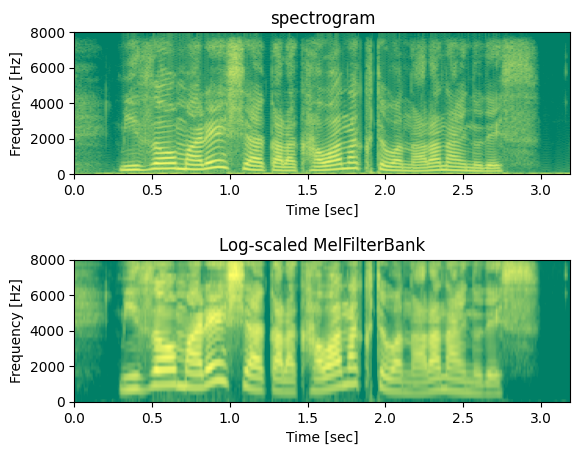

In [39]:
# plot spectrogram
plt.subplot(2, 1, 1)
spectrogram -= np.max(spectrogram)
vmax = np.abs(np.min(spectrogram)) * 0.0
vmin = -np.abs(np.min(spectrogram)) * 0.7
plt.imshow(
    spectrogram.T[-1::-1, :],
    extent=[0, num_samples / sampling_freq, 0, sampling_freq / 2],
    cmap="summer",
    vmax=vmax,
    vmin=vmin,
    aspect="auto",
)
plt.title("spectrogram")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")

# plot melfilterbank
plt.subplot(2,1,2)
fbank -= np.max(fbank)
vmax = np.abs(np.min(fbank)) * 0.0
vmin = -np.abs(np.min(fbank)) * 0.7
plt.imshow(
    fbank.T[-1::-1, :],
    extent=[0, num_samples / sampling_freq, 0, sampling_freq / 2],
    cmap="summer",
    vmax=vmax,
    vmin=vmin,
    aspect="auto",
)
plt.title("Log-scaled MelFilterBank")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [ ]:
print(spectrogram.shape, fbank.shape)

(317, 257) (317, 40)
